### This kernel is my submission to the House Prices: Advanced Regression Technique tutorial dataset. It's my first time making a IPython notebook or working with Kaggle datasets so it's mostly for learning's sake and will follow the practices of others, but I'm excited to see what results it'll get.

The steps I will walk through are:
1. Data Summarization
2. Data Cleaning
3. Data Exploration
4. Feature Engineering
5. Trying different algorithms (current planned: linear & logistic regression, SVM, random forests)
6. Comparing accuracy rates

In [1]:
#package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Summarization

In [2]:
train = pd.read_csv('~/Documents/kagglestuff/train.csv')
test = pd.read_csv('~/Documents/kagglestuff/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()
train[train.PoolArea!=0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### Observations:
- One response variable, SalePrice
- Only 7 houses have pools, with PoolArea != 0 and PoolQC not NaN
- Only ~271 houses have fences, 91 have alleys, 54 "MiscFeature", 770 fireplaces
- Lower amts of null vals in LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCont, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, Electrical, FireplaceQu, garage quals (GarageCars and GarageArea are 0 when other garage quals are null)
- Test cols that are missing data: LotFrontage, Alley, Utilities, Exterior1st and 2nd, MasVnrType and Area, Bsmt qualities, Garage qualities, Functional, FireplaceQu, Pool quals, Fence, Misc quals, SaleType

# 2. Data Cleaning

For now, the pool features will be removed, because there are too few of them.

In [5]:
train.drop(columns=['PoolQC','PoolArea'])
test.drop(columns=['PoolQC','PoolArea'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,0,120,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,0,144,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,MnPrv,NaN,0,4,2010,WD,Normal


Certain features being missing would be significant to a buyer's judgement. Therefore, we will fill in those in with 0s for NaN values to represent absence. Even the categorical values are filled with 0s, seeing as the other categories will be changed to ints for regression anyways.

In [6]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

Check to ensure no null values remain.

In [7]:
print("Train Null Values")
print(train.isnull().sum().sum())
print("Test Null Values")
print(test.isnull().sum().sum())

Train Null Values
0
Test Null Values
0


Checking counts of unique GarageQuals for each GarageCond, we can see that the two about match up. So for now, GarageQual will be removed.

In [9]:
train.groupby('GarageCond').GarageQual.value_counts()

GarageCond  GarageQual
0           0               81
Ex          Ex               2
Fa          Fa              20
            TA              15
Gd          TA               5
            Gd               4
Po          Fa               4
            Po               3
TA          TA            1291
            Fa              24
            Gd              10
            Ex               1
Name: GarageQual, dtype: int64

In [10]:
train.drop(columns='GarageQual')
test.drop(columns='GarageQual')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,120,0,0,MnPrv,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,0,IR1,HLS,AllPub,...,144,0,0,0,0,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,0.0,7980,Pave,0,IR1,Lvl,AllPub,...,0,0,0,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,0,Reg,Lvl,AllPub,...,0,0,0,MnPrv,0,0,4,2010,WD,Normal


There are many types of porch surface areas. Let's see if some of them aren't redundant with respect to sale price.

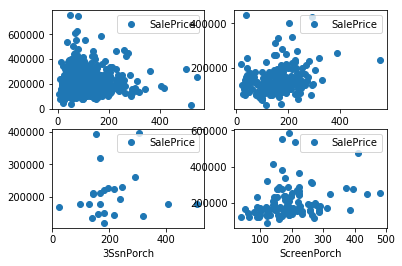

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
train[train['OpenPorchSF']!=0].plot(x='OpenPorchSF',y='SalePrice',ax=axes[0,0],style='o')
train[train['EnclosedPorch']!=0].plot(x='EnclosedPorch',y='SalePrice',ax=axes[0,1],style='o')
train[train['3SsnPorch']!=0].plot(x='3SsnPorch',y='SalePrice',ax=axes[1,0],style='o')
train[train['ScreenPorch']!=0].plot(x='ScreenPorch',y='SalePrice',ax=axes[1,1],style='o')
plt.show()

ehh fuck it

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
logmodel = LogisticRegression(C=.01)
formodel = RandomForestClassifier()
svm = SVC()
train = pd.get_dummies(train)
y_train = train['SalePrice']
X_train = train.drop(columns='SalePrice')
svm.fit(X_train, y_train)
predictions = svm.predict(X_train)
print(accuracy_score(y_train, predictions))

1.0
